In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Data Analysis

In [3]:
# Connect SQLite.
dbconn = sqlite3.connect('../data/IowaLiquorSales.db')
cursor = dbconn.cursor()

# Pull Store database.
query = '''SELECT Sales.Date, Sales.ProductID, Sales.StoreID, Store.StoreType, Sales.VolumeSold_Liters, Sales.Sale_Dollars, Store.County, County.Population, County.Year, Store.lat, Store.lng, Store.active, Product.CategoryGroup
              FROM (((Sales 
              INNER JOIN Product ON Sales.ProductID=Product.ProductID)
              INNER JOIN Store ON Sales.StoreID=Store.StoreID)
              INNER JOIN County ON County.County=Store.County)
              WHERE Sales.Date BETWEEN '2017-01-01' AND '2021-12-31' 
              AND County.Year = Sales.Year;'''
cursor.execute(query)
result = cursor.fetchall()
cursor.close()
dbconn.close()

In [4]:
# Put the database in a data frame format.
temp = pd.DataFrame(result, columns = ['Date',
                                       'ProductID',
                                       'StoreID',
                                       'StoreType',
                                       'VolumeSold_Liters', 
                                       'Sale_Dollars', 
                                       'County', 
                                       'County_Population',
                                       'County_Year',
                                       'lat',
                                       'lng', 
                                       'active', 
                                       'CategoryGroup'])

In [5]:
temp.head()

,Date,ProductID,StoreID,StoreType,VolumeSold_Liters,Sale_Dollars,County,County_Population,County_Year,lat,lng,active,CategoryGroup
0,2018-09-04,26826,4617,"Liquor, Spirits & Wine",3.00,93.44,polk,486222,2018,41.60774,-93.57014,Active,whisky
1,2019-03-19,26826,2513,Food & Grocery,18.00,560.64,johnson,152480,2019,41.65143,-91.50105,Active,whisky
2,2019-05-15,86251,5068,Convenience,12.00,43.56,dickinson,17290,2019,43.36136,-95.13954,Active,liqueur
3,2019-05-16,89566,2588,Food & Grocery,0.75,19.89,linn,227241,2019,41.97518,-91.60977,Active,tequila
4,2019-05-15,35926,2647,Food & Grocery,9.00,60.72,linn,227241,2019,41.93023,-91.71520,Active,vodka


In [6]:
temp.shape[0]

12263737

In [7]:
temp['Date'].min()

'2017-01-03'

In [8]:
temp['Date'].max()

'2021-12-31'

In [9]:
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Year'] = pd.to_datetime(temp['Date']).dt.year
temp['Month'] = pd.to_datetime(temp['Date']).dt.month

In [10]:
temp.head()

,Date,ProductID,StoreID,StoreType,VolumeSold_Liters,Sale_Dollars,County,County_Population,County_Year,lat,lng,active,CategoryGroup,Year,Month
0,2018-09-04,26826,4617,"Liquor, Spirits & Wine",3.00,93.44,polk,486222,2018,41.60774,-93.57014,Active,whisky,2018,9
1,2019-03-19,26826,2513,Food & Grocery,18.00,560.64,johnson,152480,2019,41.65143,-91.50105,Active,whisky,2019,3
2,2019-05-15,86251,5068,Convenience,12.00,43.56,dickinson,17290,2019,43.36136,-95.13954,Active,liqueur,2019,5
3,2019-05-16,89566,2588,Food & Grocery,0.75,19.89,linn,227241,2019,41.97518,-91.60977,Active,tequila,2019,5
4,2019-05-15,35926,2647,Food & Grocery,9.00,60.72,linn,227241,2019,41.93023,-91.71520,Active,vodka,2019,5


In [11]:
temp.groupby(['Year']).agg({'Sale_Dollars':'sum'})

,Sale_Dollars
Year,
2017,3.145054e+08
2018,3.342163e+08
2019,3.492202e+08
2020,3.966631e+08
2021,4.281212e+08


In [12]:
temp.groupby(['Year']).agg({'Sale_Dollars':'sum'})['Sale_Dollars']/[3143734,3149900,3159596,3163561,3185239]

Year
2017    100.041990
2018    106.103775
2019    110.526853
2020    125.385011
2021    134.407884
Name: Sale_Dollars, dtype: float64

In [13]:
county_table = pd.read_csv('../data/county.csv')

In [14]:
county_table.loc[(county_table['Year']==2021)|
                 (county_table['Year']==2020)|
                 (county_table['Year']==2019)|
                 (county_table['Year']==2018)|
                 (county_table['Year']==2017)].groupby(['Year']).agg({'Population':'sum'})

,Population
Year,
2017,3143734
2018,3149900
2019,3159596
2020,3163561
2021,3185239


In [15]:
temp[temp['Year']==2021].groupby(['Month']).agg({'Sale_Dollars':'sum'})

,Sale_Dollars
Month,
1,28665135.64
2,29617805.95
3,36653388.86
4,34734584.33
5,33659554.94
6,38890929.25
7,35176467.62
8,36501798.74
9,35837061.02


(1000.0, 2050.0)

<Figure size 864x720 with 0 Axes>

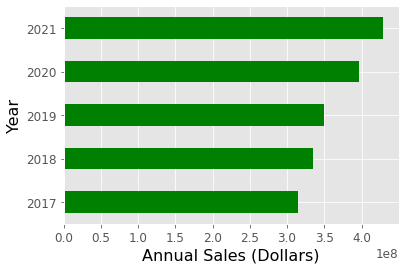

<Figure size 864x720 with 0 Axes>

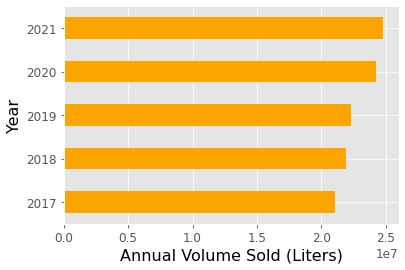

<Figure size 864x720 with 0 Axes>

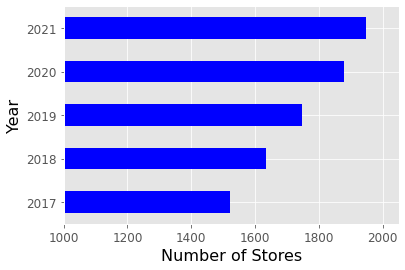

In [16]:
fig = plt.figure(figsize = (12,10))
temp.groupby(['Year']).agg({'Sale_Dollars':'sum'}).plot.barh(color = 'green')
plt.xlabel('Annual Sales (Dollars)',fontsize=16, color = 'black')
plt.ylabel('Year', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

fig = plt.figure(figsize = (12,10))
temp.groupby('Year').agg({'VolumeSold_Liters':'sum'}).plot.barh(color = 'orange')
plt.xlabel('Annual Volume Sold (Liters)',fontsize=16, color = 'black')
plt.ylabel('Year', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

fig = plt.figure(figsize = (12,10))
temp.groupby(['Year']).agg({'StoreID':'nunique'}).plot.barh(color='blue')
plt.xlabel('Number of Stores',fontsize=16, color = 'black')
plt.ylabel('Year', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)
plt.xlim(1000,2050)

(0.0, 3000000.0)

<Figure size 864x432 with 0 Axes>

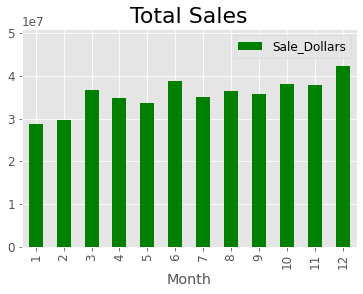

<Figure size 864x432 with 0 Axes>

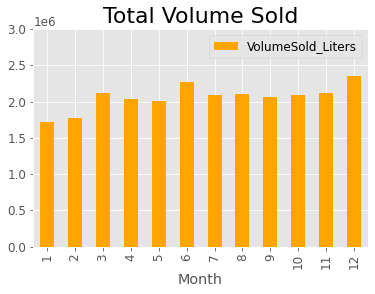

In [17]:
fig = plt.figure(figsize = (12,6))
temp[temp['Year']==2021].groupby(['Month']).agg({'Sale_Dollars':'sum'}).plot.bar(color='green')
plt.title('Total Sales',fontsize=22, color = 'black')
plt.ylim(0,5.1e7)

fig = plt.figure(figsize = (12,6))
temp[temp['Year']==2021].groupby(['Month']).agg({'VolumeSold_Liters':'sum'}).plot.bar(color='orange')
plt.title('Total Volume Sold',fontsize=22, color = 'black')
plt.ylim(0,3e6)

(25000000.0, 45000000.0)

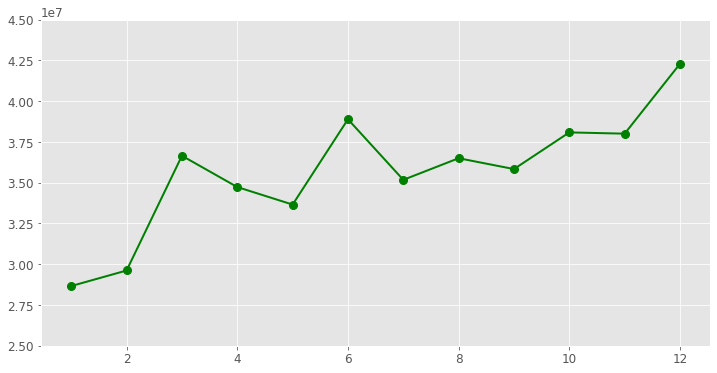

In [18]:
fig = plt.figure(figsize = (12,6))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         temp[temp['Year']==2021].groupby(['Month']).agg({'Sale_Dollars':'sum'}), 
        color='green', marker='o', linewidth=2, markersize=8)
plt.ylim(2.5e7,4.5e7)

In [19]:
temp.groupby(['Year']).agg({'Sale_Dollars':'sum'})

,Sale_Dollars
Year,
2017,3.145054e+08
2018,3.342163e+08
2019,3.492202e+08
2020,3.966631e+08
2021,4.281212e+08


In [20]:
temp.head()

,Date,ProductID,StoreID,StoreType,VolumeSold_Liters,Sale_Dollars,County,County_Population,County_Year,lat,lng,active,CategoryGroup,Year,Month
0,2018-09-04,26826,4617,"Liquor, Spirits & Wine",3.00,93.44,polk,486222,2018,41.60774,-93.57014,Active,whisky,2018,9
1,2019-03-19,26826,2513,Food & Grocery,18.00,560.64,johnson,152480,2019,41.65143,-91.50105,Active,whisky,2019,3
2,2019-05-15,86251,5068,Convenience,12.00,43.56,dickinson,17290,2019,43.36136,-95.13954,Active,liqueur,2019,5
3,2019-05-16,89566,2588,Food & Grocery,0.75,19.89,linn,227241,2019,41.97518,-91.60977,Active,tequila,2019,5
4,2019-05-15,35926,2647,Food & Grocery,9.00,60.72,linn,227241,2019,41.93023,-91.71520,Active,vodka,2019,5


Text(2015.88, 370000000.0, 'Sales ($)')

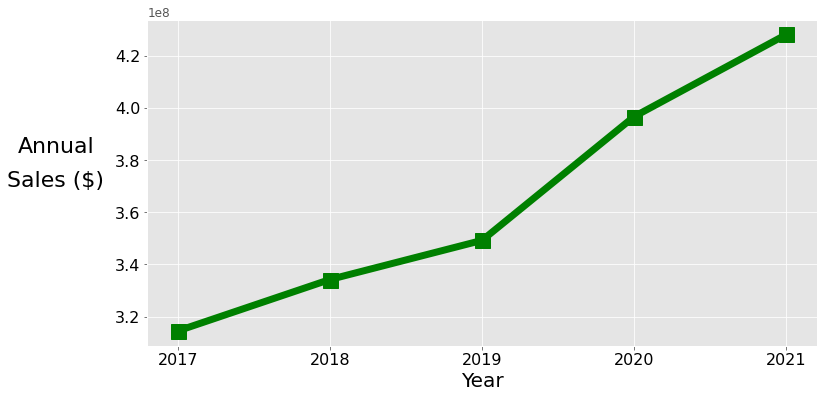

In [21]:
fig = plt.figure(figsize = (12,6))
plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.groupby(['Year']).agg({'Sale_Dollars':'sum'}), 
        color='green', marker='s', linewidth=7, markersize=15)

plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=16, color = 'black')
plt.xlabel('Year', fontsize=20, color = 'black', rotation = 0)

plt.yticks(fontsize=16, color = 'black')

plt.text(2015.95,3.83e8,'Annual',ha = 'left',
         fontsize=22,color='black',
         rotation=0)
plt.text(2015.88,3.7e8,'Sales ($)',ha = 'left',
         fontsize=22,color='black',
         rotation=0)

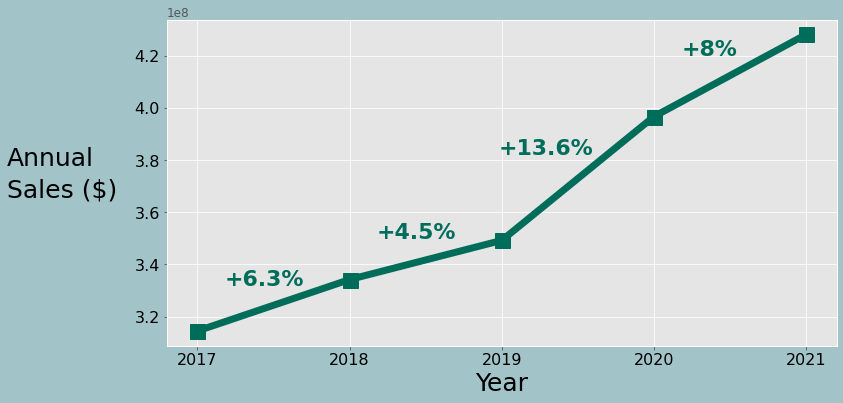

In [59]:
fig = plt.figure(figsize = (12,6))
plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.groupby(['Year']).agg({'Sale_Dollars':'sum'}), 
        color='#006D5B', marker='s', linewidth=7, markersize=15)

plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=16, color = 'black')
plt.xlabel('Year', fontsize=25, color = 'black', rotation = 0)

plt.text(2015.75,3.78e8,'Annual',ha = 'left',
         fontsize=25,color='black',
         rotation=0)
plt.text(2015.75,3.66e8,'Sales ($)',ha = 'left',
         fontsize=25,color='black',
         rotation=0)

plt.yticks(fontsize=16, color = 'black')

plt.text(2017.18,3.32e8,'+6.3%',ha = 'left',
         fontsize=22,color='#006D5B',fontweight = 'bold',
         rotation=0)
plt.text(2018.18,3.50e8,'+4.5%',ha = 'left',
         fontsize=22,color='#006D5B',fontweight = 'bold',
         rotation=0)
plt.text(2018.98,3.82e8,'+13.6%',ha = 'left',
         fontsize=22,color='#006D5B',fontweight = 'bold',
         rotation=0)
plt.text(2020.18,4.20e8,'+8%',ha = 'left',
         fontsize=22,color='#006D5B',fontweight = 'bold',
         rotation=0)

#plt.yticks([320e6, 400e6])

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


fig.patch.set_facecolor('#a2c4c9ff')

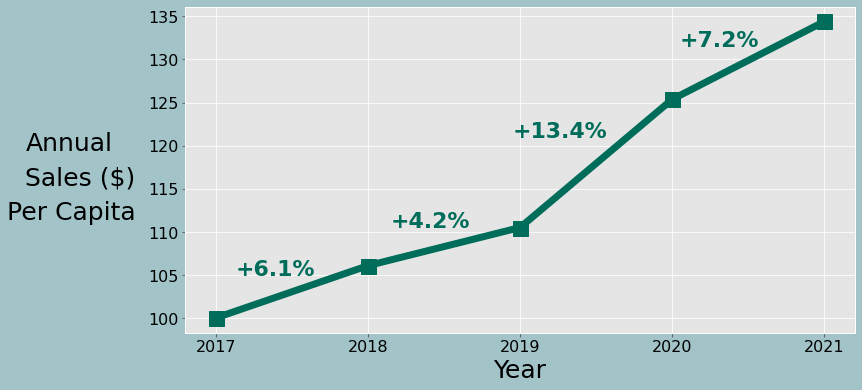

In [61]:
# is the growth due to increases in population?
# Would be better if I used population of adults > 21 years old
fig = plt.figure(figsize = (12,6))
plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.groupby(['Year']).agg({'Sale_Dollars':'sum'})['Sale_Dollars']/[3143734,3149900,3159596,3163561,3185239], 
        color='#006D5B', marker='s', linewidth=7, markersize=15)

plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=16, color = 'black')
plt.xlabel('Year', fontsize=25, color = 'black', rotation = 0)

plt.text(2015.75,119.5,'Annual',ha = 'left',
         fontsize=25,color='black',
         rotation=0)
plt.text(2015.75,115.5,'Sales ($)',ha = 'left',
         fontsize=25,color='black',
         rotation=0)
plt.text(2015.63,111.5,'Per Capita',ha = 'left',
         fontsize=25,color='black',
         rotation=0)

plt.yticks(fontsize=16, color = 'black')

plt.text(2017.13,105,'+6.1%',ha = 'left',
         fontsize=22,color='#006D5B',fontweight = 'bold',
         rotation=0)
plt.text(2018.15,110.5,'+4.2%',ha = 'left',
         fontsize=22,color='#006D5B',fontweight = 'bold',
         rotation=0)
plt.text(2018.95,121,'+13.4%',ha = 'left',
         fontsize=22,color='#006D5B',fontweight = 'bold',
         rotation=0)
plt.text(2020.05,131.5,'+7.2%',ha = 'left',
         fontsize=22,color='#006D5B',fontweight = 'bold',
         rotation=0)

plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

fig.patch.set_facecolor('#a2c4c9ff')

In [24]:
cat_sales = temp[(temp['Year']==2021)].groupby(['CategoryGroup'])['Sale_Dollars'].sum().sort_values(ascending = True)
cat_sales_df = cat_sales.to_frame().sort_values('CategoryGroup')
cat_sales_df

,Sale_Dollars
CategoryGroup,
brandy,2.123271e+07
cocktail,8.701880e+06
gin,9.746487e+06
liqueur,2.966306e+07
other,1.224169e+07
rum,4.111186e+07
schnapps,1.090899e+07
spirit,5.993690e+06
tequila,3.507131e+07


In [25]:
cat_itemcount = temp[(temp['Year']==2021)].groupby(['CategoryGroup'])['ProductID'].size()
cat_itemcount_df = cat_itemcount.to_frame().sort_values('CategoryGroup')
cat_itemcount_df

,ProductID
CategoryGroup,
brandy,119370
cocktail,84408
gin,73529
liqueur,223335
other,56282
rum,252629
schnapps,106271
spirit,37980
tequila,147280


In [26]:
(cat_sales_df['Sale_Dollars']/cat_itemcount_df['ProductID']).sort_values()

CategoryGroup
schnapps    102.652591
cocktail    103.093066
gin         132.552971
liqueur     132.818673
vodka       147.550099
spirit      157.811749
rum         162.736112
brandy      177.873120
whisky      180.000970
other       217.506229
tequila     238.126774
dtype: float64

Text(0.5, 0, 'Average Cost (Dollars) Per Item')

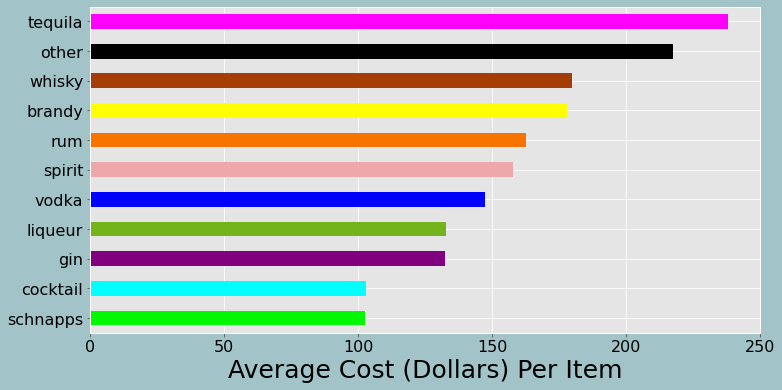

In [62]:
clrs3 = list(reversed(['magenta',
                      'black',
                      '#a43e06',
                      'yellow',
                      '#f67300',
                      '#eda8a9','blue','#72b41a','purple','cyan','#02f802']))
fig = plt.figure(figsize = (12,6))
(cat_sales_df['Sale_Dollars']/cat_itemcount_df['ProductID']).sort_values().plot.barh(color=clrs3)
plt.ylabel('', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

fig.patch.set_facecolor('#a2c4c9ff')

plt.yticks(fontsize=16, color = 'black')
plt.xticks(fontsize=16, color = 'black')

plt.xlabel('Average Cost (Dollars) Per Item', fontsize=25, color = 'black', rotation = 0)

In [28]:
temp[temp['Year']==2021].groupby(['CategoryGroup']).agg({'Sale_Dollars':'sum'}).sort_values(by ='Sale_Dollars').nlargest(5, 'Sale_Dollars').sort_values(by ='Sale_Dollars')

,Sale_Dollars
CategoryGroup,
liqueur,2.966306e+07
tequila,3.507131e+07
rum,4.111186e+07
vodka,9.295745e+07
whisky,1.604921e+08


In [29]:
clrs_products = list(reversed(['#a43e06',
        'blue',
        '#f67300',
        'magenta',                       
        '#72b41a']))

(array([0.0e+00, 2.0e+07, 4.0e+07, 6.0e+07, 8.0e+07, 1.0e+08, 1.2e+08,
        1.4e+08, 1.6e+08, 1.8e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

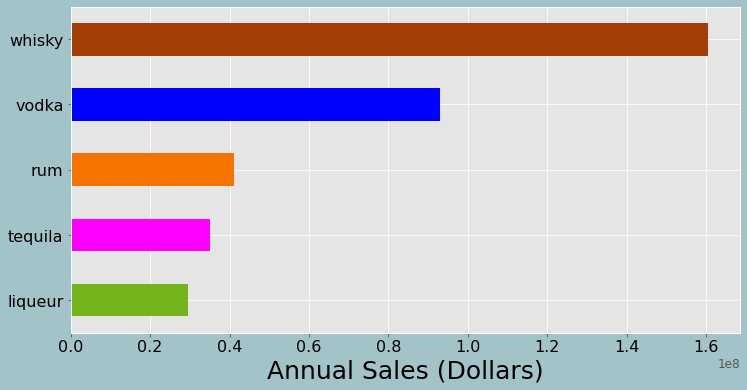

In [63]:
fig = plt.figure(figsize = (12,6))
temp[temp['Year']==2021].groupby(['CategoryGroup'])['Sale_Dollars'].sum().nlargest(5).sort_values(ascending = True).plot.barh(color=clrs_products)

plt.xlabel('Annual Sales (Dollars)',fontsize=25, color = 'black')
plt.ylabel('', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

fig.patch.set_facecolor('#a2c4c9ff')

plt.yticks(fontsize=16, color = 'black')
plt.xticks(fontsize=16, color = 'black')

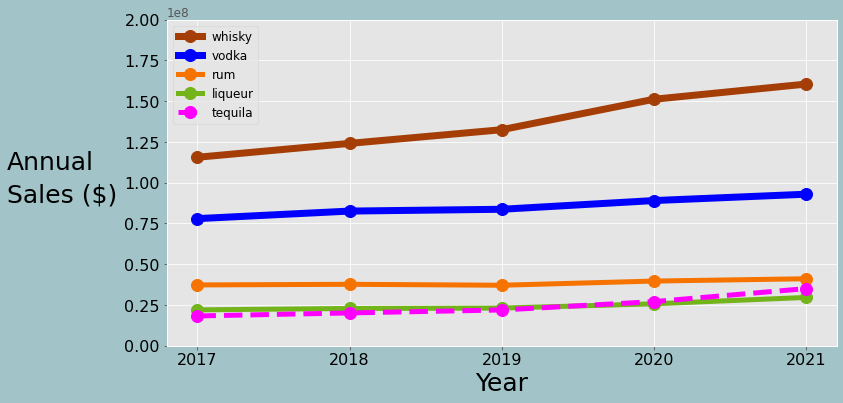

In [64]:
from matplotlib.patches import Rectangle

fig = plt.figure(figsize = (12,6))

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['CategoryGroup'] == 'whisky'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#a43e06', marker='o', linewidth=7, markersize=12, 
         label = 'whisky')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['CategoryGroup'] == 'vodka'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='blue', marker='o', linewidth=7, markersize=12, 
         label = 'vodka')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['CategoryGroup'] == 'rum'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#f67300', marker='o', linewidth=5, markersize=12, 
         label = 'rum')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['CategoryGroup'] == 'liqueur'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#72b41a', marker='o', linewidth=5, markersize=12, 
         label = 'liqueur')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['CategoryGroup'] == 'tequila'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='magenta', marker='o', linestyle="dashed", linewidth=5, markersize=12, 
         label = 'tequila')

plt.legend()

plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=16, color = 'black')
plt.xlabel('Year', fontsize=25, color = 'black', rotation = 0)

plt.ylim(0,2e8)
plt.yticks(fontsize=16, color = 'black')

plt.text(2015.75,1.08e8,'Annual',ha = 'left',
         fontsize=25,color='black',
         rotation=0)
plt.text(2015.75,0.88e8,'Sales ($)',ha = 'left',
         fontsize=25,color='black',
         rotation=0)

fig.patch.set_facecolor('#a2c4c9ff')

Text(0.5, 1.0, 'Top Product Categories')

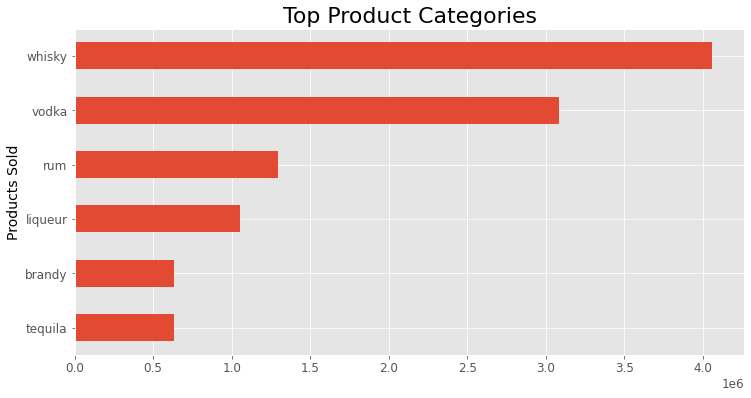

In [32]:
fig = plt.figure(figsize = (12,6))
temp.groupby('CategoryGroup').size().nlargest(6).sort_values(ascending=True).plot.barh()
plt.ylabel('Products Sold',fontsize=14, color = 'black')
plt.title('Top Product Categories',fontsize=22, color = 'black')

Text(0, 0.5, 'Product Sold')

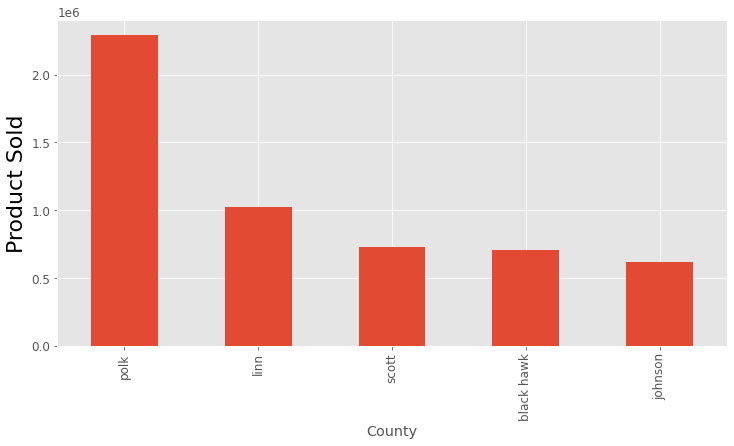

In [33]:
fig = plt.figure(figsize = (12,6))
temp.groupby('County').size().sort_values(ascending=False).nlargest(5).plot.bar()

plt.ylabel('Product Sold',fontsize=22, color = 'black')

In [ ]:
# temp[temp['Year']==2021].groupby(['County']).agg({'Sale_Dollars':'sum'})

In [34]:
temp[temp['Year']==2021].groupby(['StoreType']).agg({'Sale_Dollars':'sum'}).sort_values(by ='Sale_Dollars').nlargest(5, 'Sale_Dollars').sort_values(by ='Sale_Dollars')

,Sale_Dollars
StoreType,
Unknown,4.139974e+06
Dept. Store,6.082060e+07
Convenience,6.510767e+07
"Liquor, Spirits & Wine",7.066220e+07
Food & Grocery,2.195429e+08


<Figure size 864x432 with 0 Axes>

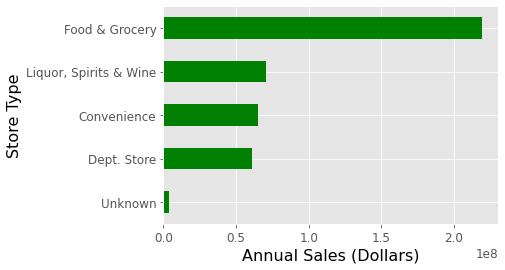

In [35]:
fig = plt.figure(figsize = (12,6))
temp[temp['Year']==2021].groupby(['StoreType']).agg({'Sale_Dollars':'sum'}).sort_values(by ='Sale_Dollars').nlargest(5, 'Sale_Dollars').sort_values(by ='Sale_Dollars').plot.barh(color='green')
plt.xlabel('Annual Sales (Dollars)',fontsize=16, color = 'black')
plt.ylabel('Store Type', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

In [36]:
temp[temp['Year']==2021].groupby(['StoreType']).agg({'StoreID':'nunique'}).sort_values(by ='StoreID', ascending = False)

,StoreID
StoreType,
Food & Grocery,986
Convenience,589
"Liquor, Spirits & Wine",144
Drugstore,95
Dept. Store,94
Distillery/Bar/Restaurant,20
Unknown,11
Hotel/Casino,9


In [37]:
temp[temp['Year']==2021].groupby(['StoreType']).agg({'StoreID':'nunique'})

,StoreID
StoreType,
Convenience,589
Dept. Store,94
Distillery/Bar/Restaurant,20
Drugstore,95
Food & Grocery,986
Hotel/Casino,9
"Liquor, Spirits & Wine",144
Unknown,11


In [38]:
temp[temp['Year']==2021].groupby(['StoreType'])['StoreID'].nunique().sort_values(ascending = True)

StoreType
Hotel/Casino                   9
Unknown                       11
Distillery/Bar/Restaurant     20
Dept. Store                   94
Drugstore                     95
Liquor, Spirits & Wine       144
Convenience                  589
Food & Grocery               986
Name: StoreID, dtype: int64

In [39]:
clrs_storecount = list(reversed(['red',
        '#F7D027',
        '#378805',
        '#ec82aa',
        'navy',
        '#9a1fe8']))

In [40]:
clrs_storecount

['#9a1fe8', 'navy', '#ec82aa', '#378805', '#F7D027', 'red']

Text(0.5, 0, 'Store Count')

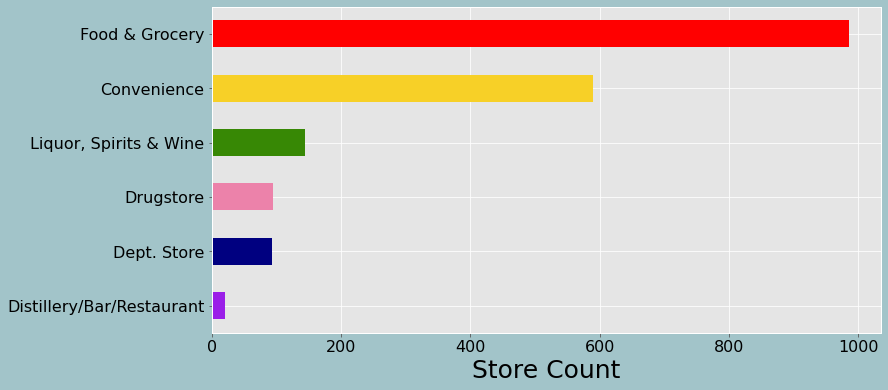

In [41]:
fig = plt.figure(figsize = (12,6))
temp[(temp['Year']==2021)&((temp['StoreType']!='Unknown')&((temp['StoreType']!='Hotel/Casino')))].groupby(['StoreType'])['StoreID'].nunique().sort_values(ascending = True).plot.barh(color=clrs_storecount)
plt.ylabel('', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

fig.patch.set_facecolor('#a2c4c9ff')

plt.yticks(fontsize=16, color = 'black')
plt.xticks(fontsize=16, color = 'black')

plt.xlabel('Store Count', fontsize=25, color = 'black', rotation = 0)

In [46]:
clrs = list(reversed(['red',
                      '#378805',
        '#F7D027',
        'navy',
        '#ec82aa',
        '#9a1fe8']))

In [43]:
type_sales = temp[(temp['Year']==2021)&((temp['StoreType']!='Unknown')&((temp['StoreType']!='Hotel/Casino')))].groupby(['StoreType'])['Sale_Dollars'].sum().sort_values(ascending = True)
type_sales_df = type_sales.to_frame().sort_values('StoreType')
type_sales_df

,Sale_Dollars
StoreType,
Convenience,6.510767e+07
Dept. Store,6.082060e+07
Distillery/Bar/Restaurant,2.796684e+06
Drugstore,3.632045e+06
Food & Grocery,2.195429e+08
"Liquor, Spirits & Wine",7.066220e+07


In [44]:
type_storecount = temp[(temp['Year']==2021)&((temp['StoreType']!='Unknown')&((temp['StoreType']!='Hotel/Casino')))].groupby(['StoreType'])['StoreID'].nunique()
type_storecount_df = type_storecount.to_frame().sort_values('StoreType')
type_storecount_df

,StoreID
StoreType,
Convenience,589
Dept. Store,94
Distillery/Bar/Restaurant,20
Drugstore,95
Food & Grocery,986
"Liquor, Spirits & Wine",144


Text(0.5, 0, 'Annual Sales (Dollars)')

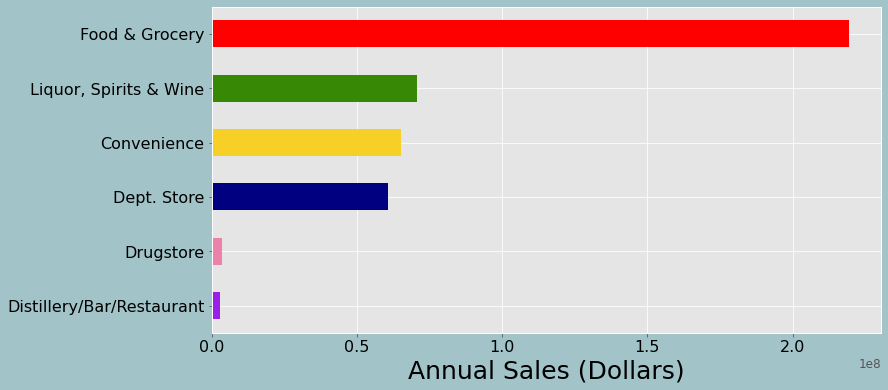

In [47]:
fig = plt.figure(figsize = (12,6))
temp[(temp['Year']==2021)&((temp['StoreType']!='Unknown')&((temp['StoreType']!='Hotel/Casino')))].groupby(['StoreType'])['Sale_Dollars'].sum().sort_values(ascending = True).plot.barh(color=clrs)
plt.xlabel('Store Count',fontsize=16, color = 'black')
plt.ylabel('', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

fig.patch.set_facecolor('#a2c4c9ff')

plt.yticks(fontsize=16, color = 'black')
plt.xticks(fontsize=16, color = 'black')

plt.xlabel('Annual Sales (Dollars)', fontsize=25, color = 'black', rotation = 0)

In [48]:
(type_sales_df['Sale_Dollars']/type_storecount_df['StoreID']).sort_values()

StoreType
Drugstore                     38232.050421
Convenience                  110539.329677
Distillery/Bar/Restaurant    139834.205500
Food & Grocery               222660.101176
Liquor, Spirits & Wine       490709.716389
Dept. Store                  647027.698191
dtype: float64

Text(0.5, 0, 'Annual Sales (Dollars) Per Store')

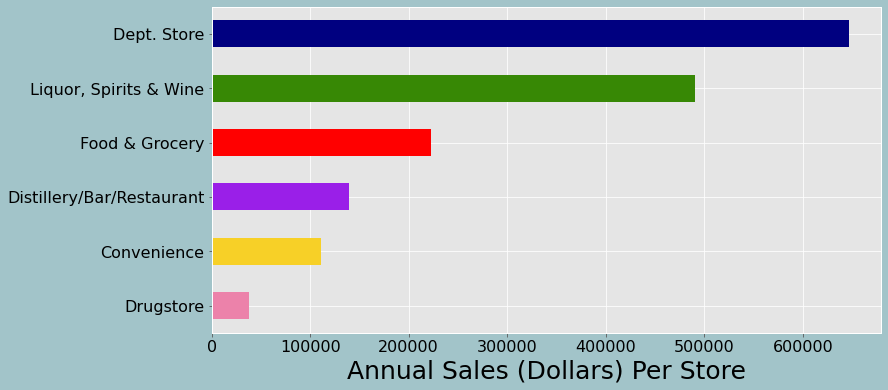

In [52]:
clrs2 = list(reversed(['navy',
                      '#378805',
                      'red',
                      '#9a1fe8',
                      '#F7D027',
                      '#ec82aa']))

fig = plt.figure(figsize = (12,6))
(type_sales_df['Sale_Dollars']/type_storecount_df['StoreID']).sort_values().plot.barh(color=clrs2)
plt.ylabel('', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

fig.patch.set_facecolor('#a2c4c9ff')

plt.yticks(fontsize=16, color = 'black')
plt.xticks(fontsize=16, color = 'black')

plt.xlabel('Annual Sales (Dollars) Per Store', fontsize=25, color = 'black', rotation = 0)

In [53]:
temp.groupby(['Year','StoreType']).agg({'StoreID':'nunique'}).sort_values(by ='StoreID')

,,StoreID
Year,StoreType,
2021,Hotel/Casino,9
2017,Hotel/Casino,9
2019,Hotel/Casino,10
2018,Hotel/Casino,10
2020,Hotel/Casino,10
2021,Unknown,11
2019,Distillery/Bar/Restaurant,19
2021,Distillery/Bar/Restaurant,20
2020,Unknown,20


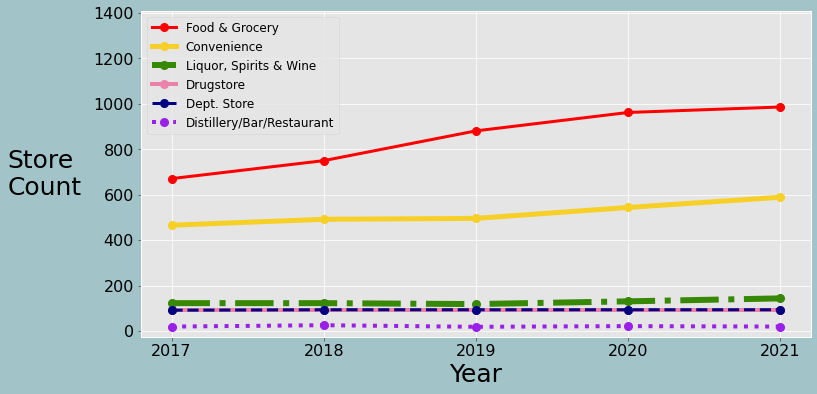

In [54]:
fig = plt.figure(figsize = (12,6))

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Food & Grocery'].groupby('Year').agg({'StoreID':'nunique'}), 
        color='red', marker='o', linewidth=3, markersize=8, 
         label = 'Food & Grocery')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Convenience'].groupby('Year').agg({'StoreID':'nunique'}), 
        color='#F7D027', marker='o', linewidth=5, markersize=8, 
         label = 'Convenience')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Liquor, Spirits & Wine'].groupby('Year').agg({'StoreID':'nunique'}), 
        color='#378805', marker='o', linestyle='dashdot', linewidth=6, markersize=8, 
         label = 'Liquor, Spirits & Wine')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Drugstore'].groupby('Year').agg({'StoreID':'nunique'}), 
        color='#ec82aa', marker='o', linewidth=4, markersize=8, 
         label = 'Drugstore')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Dept. Store'].groupby('Year').agg({'StoreID':'nunique'}), 
        color='navy', marker='o', linestyle = 'dashed', linewidth=3, markersize=8, 
         label = 'Dept. Store')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Distillery/Bar/Restaurant'].groupby('Year').agg({'StoreID':'nunique'}), 
        color='#9a1fe8', marker='o', linestyle='dotted',linewidth=4, markersize=8, 
         label = 'Distillery/Bar/Restaurant')

plt.legend(loc='best')
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=16, color = 'black')
plt.xlabel('Year', fontsize=25, color = 'black', rotation = 0)

plt.text(2015.92,720,'Store',ha = 'left',
         fontsize=25,color='black',
         rotation=0)
plt.text(2015.92,600,'Count',ha = 'left',
         fontsize=25,color='black',
         rotation=0)

plt.ylim(-25,1410)
plt.yticks(fontsize=16, color = 'black')

fig.patch.set_facecolor('#a2c4c9ff')

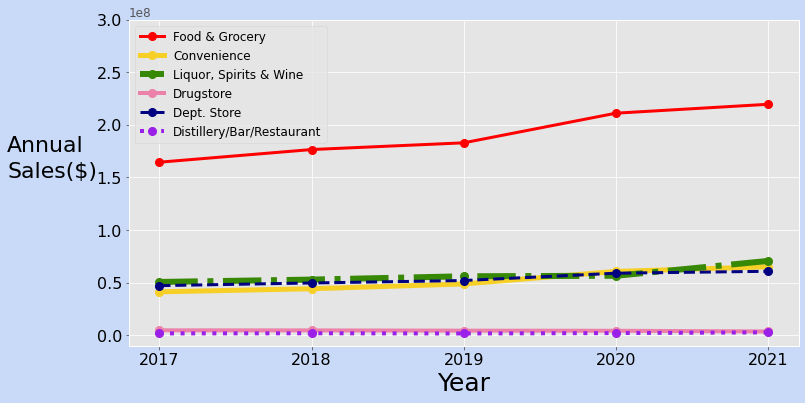

In [55]:
fig = plt.figure(figsize = (12,6))

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Food & Grocery'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='red', marker='o', linewidth=3, markersize=8, 
         label = 'Food & Grocery')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Convenience'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#F7D027', marker='o', linewidth=5, markersize=8, 
         label = 'Convenience')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Liquor, Spirits & Wine'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#378805', marker='o', linestyle='dashdot', linewidth=6, markersize=8, 
         label = 'Liquor, Spirits & Wine')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Drugstore'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#ec82aa', marker='o', linewidth=4, markersize=8, 
         label = 'Drugstore')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Dept. Store'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='navy', marker='o', linestyle = 'dashed', linewidth=3, markersize=8, 
         label = 'Dept. Store')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Distillery/Bar/Restaurant'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#9a1fe8', marker='o', linestyle='dotted', linewidth=4, markersize=8, 
         label = 'Distillery/Bar/Restaurant')

plt.legend()
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=16, color = 'black')
plt.xlabel('Year', fontsize=25, color = 'black', rotation = 0)

plt.text(2016,1.25e8+0.5e8,'Annual',ha = 'left',
         fontsize=22,color='black',
         rotation=0)
plt.text(2016,1e8+0.5e8,'Sales($)',ha = 'left',
         fontsize=22,color='black',
         rotation=0)

plt.ylim(-0.1e8,3e8)
plt.yticks(fontsize=16, color = 'black')

fig.patch.set_facecolor('#c9daf8ff')

In [74]:
temp[(temp['Year']==2021)&(temp['StoreType']=='Liquor, Spirits & Wine')].groupby('StoreID')['StoreID'].nunique().sum()

144

In [77]:
temp[(temp['Year']==2021)&(temp['StoreType']=='Liquor, Spirits & Wine')].groupby('StoreID').agg({'Sale_Dollars':'sum'})

,Sale_Dollars
StoreID,
2178,2933.14
2190,2629203.54
2191,1346072.45
2200,276140.46
2201,9770.80
2228,328939.30
2233,240009.22
3390,1509951.85
3514,317122.31


In [82]:
temp[(temp['Year']==2021)&(temp['StoreType']=='Liquor, Spirits & Wine')].groupby('StoreID').agg({'Sale_Dollars':'sum'}).median()

Sale_Dollars    240790.89
dtype: float64

In [78]:
temp[(temp['Year']==2021)&(temp['StoreType']=='Liquor, Spirits & Wine')].groupby('StoreID').agg({'Sale_Dollars':'sum'}).sum()

Sale_Dollars    70662199.16
dtype: float64

In [79]:
temp[(temp['Year']==2021)&(temp['StoreType']=='Liquor, Spirits & Wine')].groupby('StoreID').agg({'Sale_Dollars':'sum'}).std()

Sale_Dollars    1.190371e+06
dtype: float64

array([[<AxesSubplot:title={'center':'Sale_Dollars'}>]], dtype=object)

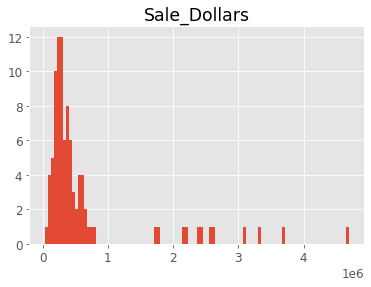

In [83]:
temp[(temp['Year']==2021)&(temp['StoreType']=='Dept. Store')].groupby('StoreID').agg({'Sale_Dollars':'sum'}).hist(column='Sale_Dollars',bins=100)

array([[<AxesSubplot:title={'center':'Sale_Dollars'}>]], dtype=object)

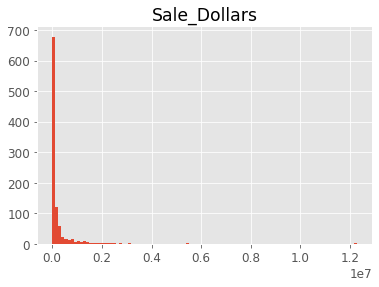

In [84]:
temp[(temp['Year']==2021)&(temp['StoreType']=='Food & Grocery')].groupby('StoreID').agg({'Sale_Dollars':'sum'}).hist(column='Sale_Dollars',bins=100)

In [103]:
ftemp = temp[(temp['Year']==2021)&((temp['StoreType']!='Unknown')&(temp['StoreType']!='Hotel/Casino'))].groupby(['StoreType','StoreID']).agg({'Sale_Dollars':'sum'})
ftemp

Sale_Dollars
StoreType              StoreID              
Convenience            2106       1033483.12
                       2130       1242342.77
                       2248        667867.97
                       2465        911646.38
                       3403        117417.78
...                                      ...
Liquor, Spirits & Wine 6229        244487.08
                       6236        140201.40
                       6242        772874.69
                       6245         10754.05
                       9049          9205.20

[1928 rows x 1 columns]

In [104]:
ftemp.groupby('StoreType').agg({'Sale_Dollars':'median'}).sort_values('Sale_Dollars')

,Sale_Dollars
StoreType,
Drugstore,30206.250
Food & Grocery,59238.420
Distillery/Bar/Restaurant,60690.155
Convenience,69476.690
"Liquor, Spirits & Wine",240790.890
Dept. Store,336738.480


In [105]:
ftemp.groupby('StoreType').agg({'Sale_Dollars':'median'}).sort_values('Sale_Dollars').squeeze(axis=1)

StoreType
Drugstore                     30206.250
Food & Grocery                59238.420
Distillery/Bar/Restaurant     60690.155
Convenience                   69476.690
Liquor, Spirits & Wine       240790.890
Dept. Store                  336738.480
Name: Sale_Dollars, dtype: float64

Text(0.5, 0, 'Median Sales (Dollars) Per Store')

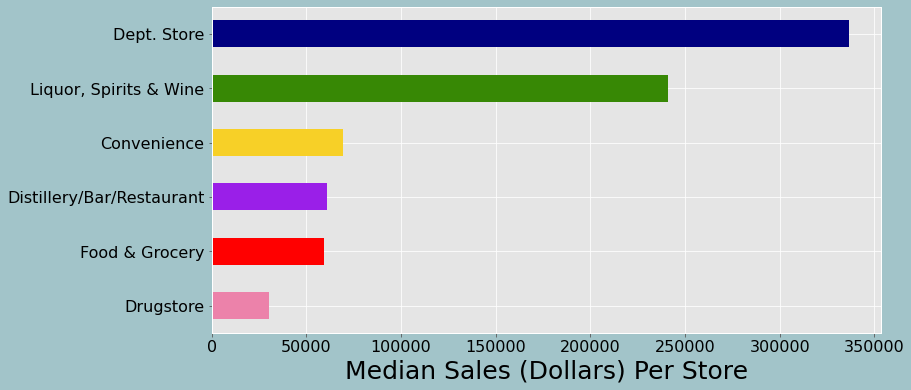

In [107]:
clrs2 = list(reversed(['navy',
                      '#378805',
                      '#F7D027',
                      '#9a1fe8',
                      'red',
                      '#ec82aa']))

fig = plt.figure(figsize = (12,6))
ftemp.groupby('StoreType').agg({'Sale_Dollars':'median'}).sort_values('Sale_Dollars').squeeze(axis=1).plot.barh(color=clrs2)
plt.ylabel('', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

fig.patch.set_facecolor('#a2c4c9ff')

plt.yticks(fontsize=16, color = 'black')
plt.xticks(fontsize=16, color = 'black')

plt.xlabel('Median Sales (Dollars) Per Store', fontsize=25, color = 'black', rotation = 0)